# Dataset Analysis

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Creating a Full Dataset

In [3]:
column_names = [
    "timestamp",
    "activity_id", 
    "heart_rate",
    "IMU_hand_temperature",
    "IMU_hand_3D_acceleration_data_16g_1",
    "IMU_hand_3D_acceleration_data_16g_2",
    "IMU_hand_3D_acceleration_data_16g_3",
    "IMU_hand_3D_acceleration_data_6g_1",
    "IMU_hand_3D_acceleration_data_6g_2",
    "IMU_hand_3D_acceleration_data_6g_3",
    "IMU_hand_3D_gyroscope_data_1",
    "IMU_hand_3D_gyroscope_data_2",
    "IMU_hand_3D_gyroscope_data_3",
    "IMU_hand_3D_magnetometer_data_1",
    "IMU_hand_3D_magnetometer_data_2",
    "IMU_hand_3D_magnetometer_data_3",
    "IMU_hand_orientation_1",
    "IMU_hand_orientation_2",
    "IMU_hand_orientation_3",
    "IMU_hand_orientation_4",
    "IMU_chest_temperature",
    "IMU_chest_3D_acceleration_data_16g_1",
    "IMU_chest_3D_acceleration_data_16g_2",
    "IMU_chest_3D_acceleration_data_16g_3",
    "IMU_chest_3D_acceleration_data_6g_1",
    "IMU_chest_3D_acceleration_data_6g_2",
    "IMU_chest_3D_acceleration_data_6g_3",
    "IMU_chest_3D_gyroscope_data_1",
    "IMU_chest_3D_gyroscope_data_2",
    "IMU_chest_3D_gyroscope_data_3",
    "IMU_chest_3D_magnetometer_data_1",
    "IMU_chest_3D_magnetometer_data_2",
    "IMU_chest_3D_magnetometer_data_3",
    "IMU_chest_orientation_1",
    "IMU_chest_orientation_2",
    "IMU_chest_orientation_3",
    "IMU_chest_orientation_4",
    "IMU_ankle_temperature",
    "IMU_ankle_3D_acceleration_data_16g_1",
    "IMU_ankle_3D_acceleration_data_16g_2",
    "IMU_ankle_3D_acceleration_data_16g_3",
    "IMU_ankle_3D_acceleration_data_6g_1",
    "IMU_ankle_3D_acceleration_data_6g_2",
    "IMU_ankle_3D_acceleration_data_6g_3",
    "IMU_ankle_3D_gyroscope_data_1",
    "IMU_ankle_3D_gyroscope_data_2",
    "IMU_ankle_3D_gyroscope_data_3",
    "IMU_ankle_3D_magnetometer_data_1",
    "IMU_ankle_3D_magnetometer_data_2",
    "IMU_ankle_3D_magnetometer_data_3",
    "IMU_ankle_orientation_1",
    "IMU_ankle_orientation_2",
    "IMU_ankle_orientation_3",
    "IMU_ankle_orientation_4"
]

col_for_drop = [col for col in column_names if col.endswith(tuple(f"orientation_{i}" for i in range(1, 5)))]
col_for_drop += [col for col in column_names if col.endswith(tuple(f"acceleration_data_6g_{i}" for i in range(1, 4)))]

In [4]:
person1 = pd.read_csv("Protocol/subject101.dat", delimiter=" ", names=column_names, header=None)
person2 = pd.read_csv("Protocol/subject102.dat", delimiter=" ", names=column_names, header=None)
person3 = pd.read_csv("Protocol/subject103.dat", delimiter=" ", names=column_names, header=None)
person4 = pd.read_csv("Protocol/subject104.dat", delimiter=" ", names=column_names, header=None)
person5 = pd.read_csv("Protocol/subject105.dat", delimiter=" ", names=column_names, header=None)
person6 = pd.read_csv("Protocol/subject106.dat", delimiter=" ", names=column_names, header=None)
person7 = pd.read_csv("Protocol/subject107.dat", delimiter=" ", names=column_names, header=None)
person8 = pd.read_csv("Protocol/subject108.dat", delimiter=" ", names=column_names, header=None)
person9 = pd.read_csv("Protocol/subject109.dat", delimiter=" ", names=column_names, header=None)

person1_additional = pd.read_csv("Optional/subject101.dat", delimiter=" ", names=column_names, header=None)
person5_additional = pd.read_csv("Optional/subject105.dat", delimiter=" ", names=column_names, header=None)
person6_additional = pd.read_csv("Optional/subject106.dat", delimiter=" ", names=column_names, header=None)
person8_additional = pd.read_csv("Optional/subject108.dat", delimiter=" ", names=column_names, header=None)
person9_additional = pd.read_csv("Optional/subject109.dat", delimiter=" ", names=column_names, header=None)

## Data Preprocessing

***
### Заполнение пульса:
***

In [5]:
df_list = [person1, person2, person3, person4, person5, person6, person7, person8, person9, 
           person1_additional, person5_additional, person6_additional, person8_additional, person9_additional]

for df in df_list:
    hr_positions = np.flatnonzero(df['heart_rate'].notna())
    if len(hr_positions) < 2:
        continue
    first_idx, second_idx = hr_positions[0], hr_positions[1]
    hr_1 = df['heart_rate'].iat[first_idx]
    hr_2 = df['heart_rate'].iat[second_idx]
    for pos in hr_positions[2:]:
        fill_val = (hr_1 + hr_2) / 2
        df.loc[first_idx + 1 : second_idx, 'heart_rate'] = (
            df.loc[first_idx + 1 : second_idx, 'heart_rate'].fillna(fill_val)
        )
        first_idx, second_idx = second_idx, pos
        hr_1, hr_2 = hr_2, df['heart_rate'].iat[pos]
    df.loc[second_idx + 1 :, 'heart_rate'] = (
        df.loc[second_idx + 1 :, 'heart_rate'].fillna(hr_2)
    )

## Dataset Splitting with Temporal Consistency

***
### Создание df_all с учетом деления на людей и временной согласованности:
***

In [6]:
all_classes = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]

subjects = {
    1: [person1, person1_additional],
    2: [person2],
    3: [person3],
    4: [person4],
    5: [person5, person5_additional],
    6: [person6, person6_additional],
    7: [person7],
    8: [person8, person8_additional],
    9: [person9, person9_additional]
}

df_all = pd.DataFrame()
for subject_id, dfs in subjects.items():
    df_subject = pd.concat(dfs, axis=0, ignore_index=True)
    df_subject['subject_id'] = subject_id
    df_all = pd.concat([df_all, df_subject], axis=0, ignore_index=True)

df_all = df_all.drop(columns=col_for_drop)
df_all = df_all.dropna()
df_all = df_all[df_all["activity_id"] != 0]

# Проверка активностей:
unique_activities = sorted(df_all['activity_id'].unique())
print(f"Unique activities in combined dataset: {unique_activities}")
if set(unique_activities) == set(all_classes):
    print("All required classes are present in the combined dataset.")
else:
    print(f"Warning: Missing classes {set(all_classes) - set(unique_activities)}")

Unique activities in combined dataset: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(24)]
All required classes are present in the combined dataset.


***
### Мини-EDA для датасета:
***

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

print("Размер датасета:", df_all.shape)
print("\nПервые 5 строк:")
print(df_all.head())
print("\nТипы данных:")
print(df_all.dtypes)

numeric_cols = df_all.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('activity_id')
numeric_cols.remove('subject_id')
categorical_cols = ['activity_id', 'subject_id']
print("\nЧисловые признаки:", numeric_cols)
print("Категориальные признаки:", categorical_cols)

Размер датасета: (2700980, 34)

Первые 5 строк:
      timestamp  activity_id  heart_rate  IMU_hand_temperature  \
2928      37.66            1       100.0                30.375   
2929      37.67            1       100.0                30.375   
2930      37.68            1       100.0                30.375   
2931      37.69            1       100.0                30.375   
2932      37.70            1       100.0                30.375   

      IMU_hand_3D_acceleration_data_16g_1  \
2928                              2.21530   
2929                              2.29196   
2930                              2.29090   
2931                              2.21800   
2932                              2.30106   

      IMU_hand_3D_acceleration_data_16g_2  \
2928                              8.27915   
2929                              7.67288   
2930                              7.14240   
2931                              7.14365   
2932                              7.25857   

      IMU_han

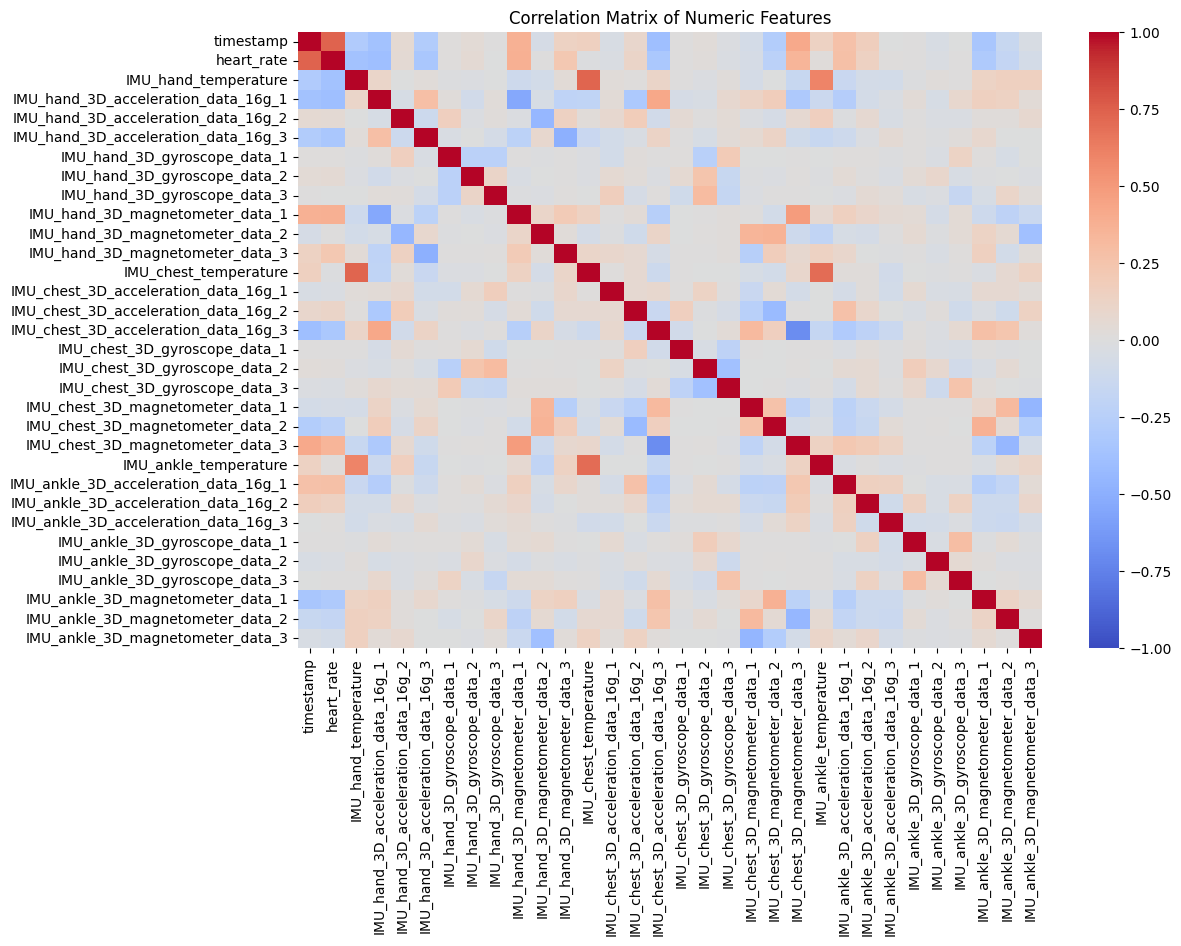


Высокие корреляции (|corr| > 0.7):
timestamp              heart_rate               0.735400
heart_rate             timestamp                0.735400
IMU_hand_temperature   IMU_chest_temperature    0.729378
IMU_chest_temperature  IMU_hand_temperature     0.729378
dtype: float64


In [7]:
# Матрица корреляций для числовых признако
plt.figure(figsize=(12, 8))
corr_matrix = df_all[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

corr_pairs = corr_matrix.unstack()
high_corr = corr_pairs[(abs(corr_pairs) > 0.7) & (abs(corr_pairs) < 1)].sort_values(ascending=False)
print("\nВысокие корреляции (|corr| > 0.7):")
print(high_corr)

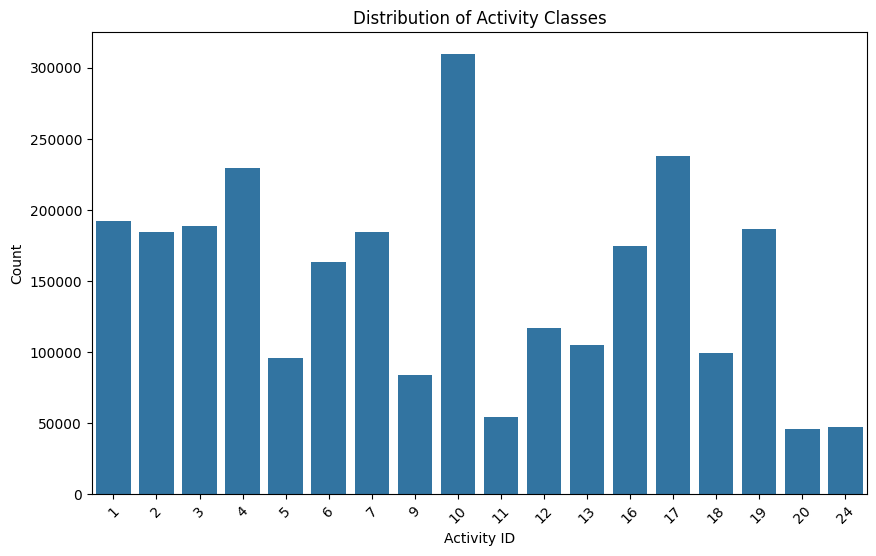

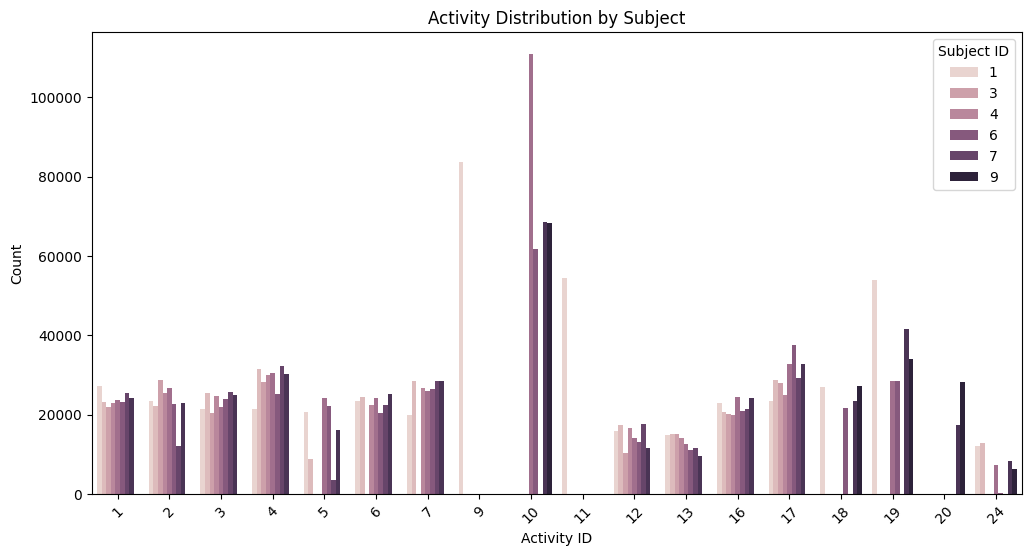


Доля каждого класса activity_id:
activity_id
10    0.114626
17    0.088080
4     0.085047
1     0.071193
3     0.069969
19    0.069093
2     0.068362
7     0.068288
16    0.064782
6     0.060460
12    0.043352
13    0.038825
18    0.036821
5     0.035406
9     0.030960
11    0.020158
24    0.017608
20    0.016970
Name: proportion, dtype: float64


In [8]:
# Распределение activity_id
plt.figure(figsize=(10, 6))
sns.countplot(x='activity_id', data=df_all, order=sorted(df_all['activity_id'].unique()))
plt.title('Distribution of Activity Classes')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Распределение activity_id по субъектам
plt.figure(figsize=(12, 6))
sns.countplot(x='activity_id', hue='subject_id', data=df_all, order=sorted(df_all['activity_id'].unique()))
plt.title('Activity Distribution by Subject')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.legend(title='Subject ID')
plt.xticks(rotation=45)
plt.show()

# Доля классов
class_counts = df_all['activity_id'].value_counts(normalize=True)
print("\nДоля каждого класса activity_id:")
print(class_counts)

Выбранные признаки для анализа динамики: ['IMU_hand_3D_acceleration_data_16g_1', 'IMU_hand_3D_acceleration_data_16g_2', 'IMU_hand_3D_acceleration_data_16g_3']


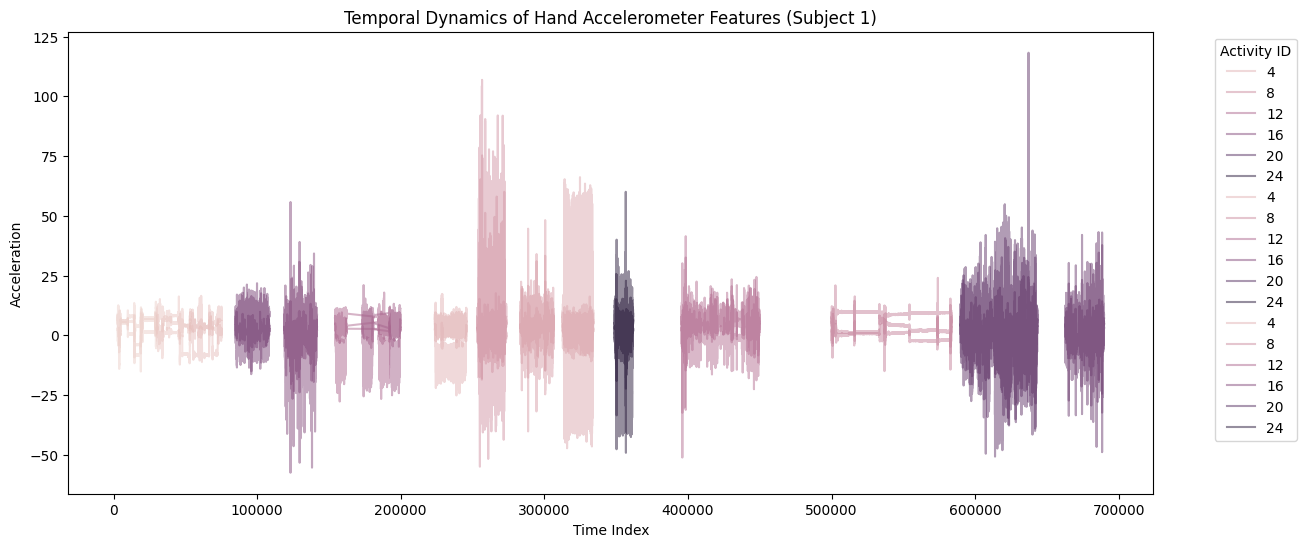

In [9]:
accel_cols = [col for col in numeric_cols if 'accel' in col and 'hand' in col]
print("Выбранные признаки для анализа динамики:", accel_cols)

subject_1 = df_all[df_all['subject_id'] == 1].copy()
subject_1['time'] = subject_1.index

plt.figure(figsize=(14, 6))
for col in accel_cols:
    sns.lineplot(x='time', y=col, hue='activity_id', data=subject_1, alpha=0.5)
plt.title('Temporal Dynamics of Hand Accelerometer Features (Subject 1)')
plt.xlabel('Time Index')
plt.ylabel('Acceleration')
plt.legend(title='Activity ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Boxplot для топ-признаков
plt.figure(figsize=(14, 6))
for i, col in enumerate(top_numeric_cols[:3], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='activity_id', y=col, data=df_all)
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Violin Plot
plt.figure(figsize=(14, 6))
for i, col in enumerate(top_numeric_cols[:3], 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='activity_id', y=col, data=df_all)
    plt.title(f'Violin Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

# Мозаичный плот для activity_id и subject_i
plt.figure(figsize=(10, 6))
mosaic(df_all, ['activity_id', 'subject_id'], title='Mosaic Plot of Activity ID vs Subject ID')
plt.show()

In [11]:
# Проверка аномалий (например, экстремальные значения)
from scipy.stats import zscore
z_scores = df_all[numeric_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("\nКоличество выбросов (|z-score| > 3) по признакам:")
print(outliers[outliers > 0])


Количество выбросов (|z-score| > 3) по признакам:
heart_rate                              13315
IMU_hand_temperature                    34765
IMU_hand_3D_acceleration_data_16g_1     17807
IMU_hand_3D_acceleration_data_16g_2     34378
IMU_hand_3D_acceleration_data_16g_3     25277
IMU_hand_3D_gyroscope_data_1            61218
IMU_hand_3D_gyroscope_data_2            64722
IMU_hand_3D_gyroscope_data_3            65752
IMU_hand_3D_magnetometer_data_1          6353
IMU_hand_3D_magnetometer_data_2          9783
IMU_hand_3D_magnetometer_data_3         55534
IMU_chest_3D_acceleration_data_16g_1    40819
IMU_chest_3D_acceleration_data_16g_2    37653
IMU_chest_3D_acceleration_data_16g_3     5732
IMU_chest_3D_gyroscope_data_1           48357
IMU_chest_3D_gyroscope_data_2           70556
IMU_chest_3D_gyroscope_data_3           51444
IMU_chest_3D_magnetometer_data_1         7165
IMU_chest_3D_magnetometer_data_2        20050
IMU_chest_3D_magnetometer_data_3         2811
IMU_ankle_temperature        

***
### Разделение на трейн и тест с учетом времени (классы активности, которые не попали - потом добавляются по маске и заново сортируются по людям и времени для сохранения порядка):
***

In [ ]:
import pandas as pd

required_cols = {'subject_id', 'timestamp', 'activity_id'}
if not required_cols.issubset(df_all.columns):
    missing = required_cols - set(df_all.columns)
    raise ValueError(f"В df_all отсутствуют обязательные колонки: {missing}")

if not pd.api.types.is_datetime64_any_dtype(df_all['timestamp']):
    df_all['timestamp'] = pd.to_datetime(df_all['timestamp'], errors='raise')


df_all = df_all.sort_values(['subject_id', 'timestamp']).reset_index(drop=True)

train_parts = []
test_parts  = []

for subject_id, df_subj in df_all.groupby('subject_id', sort=False):
    df_subj = df_subj.reset_index(drop=True)
    n_subj = len(df_subj)
    start_idx = 0

    while start_idx < n_subj:
        current_activity = df_subj.loc[start_idx, 'activity_id']
        end_idx = start_idx + 1
        while end_idx < n_subj and df_subj.loc[end_idx, 'activity_id'] == current_activity:
            end_idx += 1

        block = df_subj.iloc[start_idx:end_idx]
        block_len = end_idx - start_idx

        k = int(block_len * 0.8)
        if block_len >= 2:
            k = max(1, min(block_len - 1, k))
        else:
            k = 0

        if k > 0:
            train_parts.append(block.iloc[:k])
        test_parts.append(block.iloc[k:])

        start_idx = end_idx

train_df = pd.concat(train_parts, ignore_index=True)
test_df  = pd.concat(test_parts,  ignore_index=True)


used_in_train = set(train_df.index)
used_in_test  = set(test_df.index)

total_used = len(train_df) + len(test_df)
total_all  = len(df_all)

if total_used != total_all:
    print(f"Внимание: использовано {total_used} строк, а всего в df_all — {total_all}.")
else:
    print(f"Все {total_all} строк из df_all распределены между train и test.")


all_classes       = sorted(df_all['activity_id'].unique())
train_classes     = sorted(train_df['activity_id'].unique())
test_classes      = sorted(test_df['activity_id'].unique())
missing_in_train  = set(all_classes) - set(train_classes)
missing_in_test   = set(all_classes) - set(test_classes)

print(f"\nКлассы, присутствующие в train: {train_classes}")
print(f"Классы, присутствующие в test:  {test_classes}")

if not missing_in_train and not missing_in_test:
    print("Все классы из df_all есть и в train, и в test.")
else:
    if missing_in_train:
        print(f"В train не хватает классов: {sorted(missing_in_train)}")
    if missing_in_test:
        print(f"В test не хватает классов: {sorted(missing_in_test)}")


train_df = train_df.sort_values(['subject_id', 'timestamp']).reset_index(drop=True)
test_df  = test_df.sort_values(['subject_id', 'timestamp']).reset_index(drop=True)

print(f"\nИтоги (после финальной сортировки):")
print(f"  Размер train: {len(train_df)}")
print(f"  Размер test:  {len(test_df)}")

✅ Все 2700980 строк из df_all распределены между train и test.

Классы, присутствующие в train: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(24)]
Классы, присутствующие в test:  [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(24)]
✅ Все классы из df_all есть и в train, и в test.

Итоги (после финальной сортировки):
  Размер train: 2160346
  Размер test:  540634


## Feature Engineering

In [8]:
for df in [train_df, test_df]:
    df["sum_temperature"] = (
        df["IMU_hand_temperature"] +
        df["IMU_chest_temperature"] +
        df["IMU_ankle_temperature"]
    )
    df["sum_hand_acceleration"] = (
        df["IMU_hand_3D_acceleration_data_16g_1"] +
        df["IMU_hand_3D_acceleration_data_16g_2"] +
        df["IMU_hand_3D_acceleration_data_16g_3"]
    )
    df["sum_chest_acceleration"] = (
        df["IMU_chest_3D_acceleration_data_16g_1"] +
        df["IMU_chest_3D_acceleration_data_16g_2"] +
        df["IMU_chest_3D_acceleration_data_16g_3"]
    )
    df["sum_ankle_acceleration"] = (
        df["IMU_ankle_3D_acceleration_data_16g_1"] +
        df["IMU_ankle_3D_acceleration_data_16g_2"] +
        df["IMU_ankle_3D_acceleration_data_16g_3"]
    )
    df["heart_rate_rolling_mean"] = df["heart_rate"].rolling(window=5, min_periods=1).mean()

## Encoding and Preparation for Modeling

In [9]:
X_train = train_df.drop(columns=["activity_id", "subject_id", "timestamp"])
y_train = train_df["activity_id"]
X_test = test_df.drop(columns=["activity_id", "subject_id", "timestamp"])
y_test = test_df["activity_id"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

## Sequence Preparation for HMM (пока не нужно)

In [15]:
import numpy as np

def create_sequences(X, y, window_size=100):
    sequences = []
    labels = []
    X_values = X.values if hasattr(X, 'values') else X
    y_values = np.asarray(y)
    
    for i in range(0, len(X) - window_size + 1, window_size):
        sequences.append(X_values[i:i + window_size])
        labels.append(np.bincount(y_values[i:i + window_size].astype(int)).argmax())
    return np.array(sequences), np.array(labels)

X_train_seq, y_train_seq = create_sequences(X_train, y_train_enc)
X_test_seq, y_test_seq = create_sequences(X_test, y_test_enc)

print(f"Train sequences: {X_train_seq.shape}, Test sequences: {X_test_seq.shape}")

Train sequences: (21603, 100, 36), Test sequences: (5406, 100, 36)


***
### Обучение моделей:
***

***
#### XGBoost:
***

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.utils import resample

X_train_sub, y_train_sub = X_train, y_train

# Кодирование меток
train_classes = np.unique(y_train_sub)
le = LabelEncoder().fit(train_classes)
y_train_enc = le.transform(y_train_sub)

# Фильтрация тестового набора (только классы из тренировочного)
test_mask = np.isin(y_test, train_classes)
X_test_filt = X_test[test_mask]
y_test_filt = y_test[test_mask]

# Пайплайн с масштабированием и моделью
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        n_estimators=300,
        learning_rate=0.1,
        max_depth=10,
        random_state=42
    ))
])

# Обучение
pipeline.fit(X_train_sub, y_train_enc)

# Предсказания
y_pred_enc = pipeline.predict(X_test_filt)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка
print("XGBoost Classification Report:")
print(classification_report(y_test_filt, y_pred))

XGBoost Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99     38470
           2       1.00      0.96      0.98     36952
           3       0.95      0.88      0.91     37840
           4       0.99      0.80      0.88     46005
           5       0.94      0.94      0.94     19130
           6       0.94      0.90      0.92     32676
           7       0.79      0.96      0.87     36920
           9       1.00      0.95      0.98     16727
          10       1.00      0.84      0.91     61940
          11       1.00      1.00      1.00     10898
          12       0.86      0.72      0.79     23427
          13       0.73      0.90      0.81     20979
          16       0.82      0.99      0.90     35031
          17       0.79      0.89      0.84     47625
          18       0.92      1.00      0.96     19926
          19       0.90      0.92      0.91     37393
          20       0.94      0.97      0.95      9

***
#### Random Forest:
***

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.90      0.95     38470
           2       0.97      0.94      0.95     36952
           3       0.82      0.90      0.86     37840
           4       0.76      0.85      0.80     46005
           5       0.89      0.91      0.90     19130
           6       0.92      0.87      0.89     32676
           7       0.74      0.93      0.82     36920
           9       1.00      0.93      0.96     16727
          10       0.97      0.93      0.95     61940
          11       1.00      0.97      0.98     10898
          12       0.74      0.62      0.68     23427
          13       0.45      0.33      0.39     20979
          16       0.83      0.79      0.81     35031
          17       0.76      0.98      0.85     47625
          18       0.99      0.67      0.80     19926
          19       0.88      0.82      0.85     37393
          20       0.90      0.99      0.94 

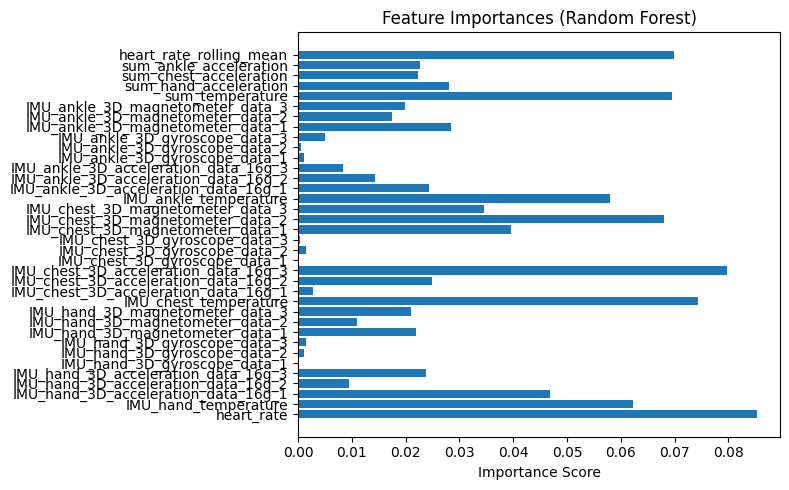

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

X_train_sub, y_train_sub = X_train, y_train

# Кодирование меток
le = LabelEncoder().fit(all_classes)
y_train_enc = le.transform(y_train_sub)
y_test_enc = le.transform(y_test)

# Модель
model = RandomForestClassifier(
    n_estimators=300, 
    max_depth=8,
    random_state=42,
    n_jobs=-1
)

# Обучение
model.fit(X_train_sub, y_train_enc)

# Предсказания
y_pred_enc = model.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Важность признаков
importances = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

***
#### Logistic Regression:
***

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.95      0.96     38470
           2       0.81      0.83      0.82     36952
           3       0.71      0.76      0.73     37840
           4       0.83      0.79      0.81     46005
           5       0.66      0.74      0.70     19130
           6       0.88      0.85      0.87     32676
           7       0.65      0.72      0.68     36920
           9       1.00      0.94      0.97     16727
          10       0.99      0.98      0.98     61940
          11       0.98      0.98      0.98     10898
          12       0.45      0.48      0.47     23427
          13       0.47      0.36      0.41     20979
          16       0.79      0.80      0.80     35031
          17       0.73      0.85      0.79     47625
          18       0.60      0.45      0.51     19926
          19       0.72      0.58      0.64     37393
          20       0.75      0.92     

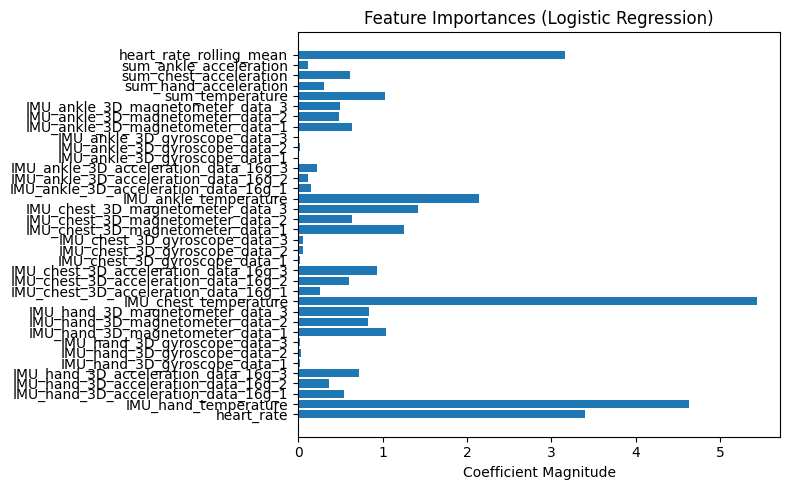

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample

X_train_sub, y_train_sub = X_train, y_train

# Масштабирование
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_sub)
X_test_scaled = scaler.transform(X_test)

# Кодирование меток
le = LabelEncoder().fit(all_classes)
y_train_enc = le.transform(y_train_sub)
y_test_enc = le.transform(y_test)

# Модель
model = LogisticRegression(
    max_iter=300,
    random_state=42
)

# Обучение
model.fit(X_train_scaled, y_train_enc)

# Предсказания
y_pred_enc = model.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Важность признаков
coefficients = np.abs(model.coef_).mean(axis=0)
features = X_train.columns
plt.figure(figsize=(8, 5))
plt.barh(features, coefficients)
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importances (Logistic Regression)")
plt.tight_layout()
plt.show()

***
#### CatBoost:
***

CatBoost Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.89      0.94     38470
           2       0.95      0.93      0.94     36952
           3       0.86      0.94      0.90     37840
           4       0.92      0.75      0.82     46005
           5       0.94      0.93      0.93     19130
           6       0.93      0.90      0.92     32676
           7       0.74      0.95      0.83     36920
           9       1.00      0.93      0.96     16727
          10       0.97      0.90      0.93     61940
          11       1.00      0.99      0.99     10898
          12       0.69      0.69      0.69     23427
          13       0.62      0.58      0.60     20979
          16       0.91      0.92      0.91     35031
          17       0.91      0.98      0.95     47625
          18       0.89      0.94      0.92     19926
          19       0.82      0.87      0.84     37393
          20       0.83      0.95      0.89      

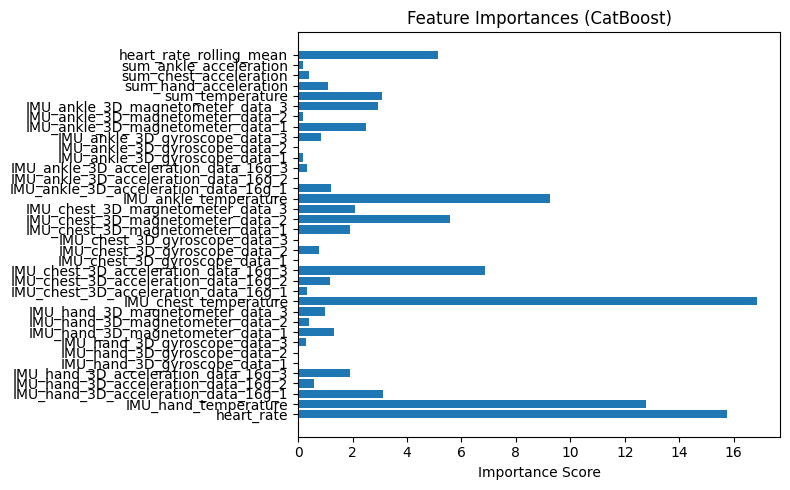

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from sklearn.utils import resample

X_train_sub, y_train_sub = X_train, y_train

# Кодирование меток
le = LabelEncoder().fit(all_classes)
y_train_enc = le.transform(y_train_sub)
y_test_enc = le.transform(y_test)

# Модель
model = CatBoostClassifier(
    iterations=300, 
    depth=8, 
    learning_rate=0.1,
    loss_function='MultiClass',
    verbose=False,
    random_seed=42
)

# Обучение
model.fit(X_train_sub, y_train_enc)

# Предсказания
y_pred_enc = model.predict(X_test).flatten().astype(int)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred))

# Важность признаков
importances = model.get_feature_importance()
features = X_train.columns
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importances (CatBoost)")
plt.tight_layout()
plt.show()

***
### XGBoost + HMM:
***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

# Функция ordered_unique
def ordered_unique(x):
    """Return unique elements, maintaining order of appearance"""
    return np.unique(x)[np.argsort(np.unique(x, return_index=True)[1])]

# Реализация HMM
class HMM:
    def __init__(self, startprob=None, emissionprob=None, transmat=None, n_iter=100, random_state=None):
        self.startprob = startprob
        self.emissionprob = emissionprob
        self.transmat = transmat
        self.n_iter = n_iter
        self.random_state = random_state
        self.labels = None

    def __str__(self):
        return (
            "HMM Model:\n"
            f"{ {'startprob': self.startprob, 'emission': self.emissionprob, 'transition': self.transmat} }"
        )

    def fit(self, Y_pred, Y_true, groups=None):
        self.labels = np.sort(np.unique(Y_true))
        self.startprob = self.compute_probability(Y_true, self.labels, uniform=False)
        self.emissionprob = self.compute_emission_probability(Y_pred, Y_true, self.labels)
        self.transmat = self.compute_transition_probability(Y_true, self.labels, groups)

    def compute_probability(self, Y_true, labels=None, uniform=False):
        if labels is None:
            labels = np.sort(np.unique(Y_true))

        if uniform:
            probability = np.ones(self.labels(Y_true)) / len(Y_true)
        else:
            probability = np.mean(Y_true.reshape(-1, 1) == labels, axis=0)
        return probability

    def compute_emission_probability(self, Y_score, Y_true, labels=None):
        if labels is None:
            labels = np.sort(np.unique(Y_true))

        if Y_score.ndim == 1:
            Y_pred = np.vstack([
                (Y_score == labels).astype('float')[:, None]
            for label in labels])
        else:
            Y_pred = Y_score

        emission = np.vstack([
            np.mean(Y_pred[Y_true == label], axis=0) for label in labels
        ])
        return emission

    def compute_transition_probability(self, Y, labels=None, groups=None):
        if labels is None:
            labels = np.sort(np.unique(Y))

        def _compute_transition(Y):
            transition = np.vstack([
                np.sum(Y[1:][(Y == label)[:-1]].reshape(-1, 1) == labels, axis=0)
                for label in labels
            ])
            return transition

        if groups is None:
            transition = _compute_transition(Y)
        else:
            transition = sum((
                _compute_transition(Y[groups == g])
                for g in ordered_unique(groups)
            ))

        transition = transition + 1
        transition = transition / np.sum(transition, axis=1).reshape(-1, 1)
        return transition

    def predict(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }

        if groups is None:
            Y_vit, _ = self._viterbi(Y, params)
        else:
            Y_vit = np.concatenate([
                self._viterbi(Y[groups == g], params)[0]
                for g in ordered_unique(groups)
            ])
        return Y_vit

    def predict_probability(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }
        if groups is None:
            _, probs = self._viterbi(Y, params, True)
        else:
            probs = np.concatenate([
                self._viterbi(Y[groups == g], params, True)[1]
                for g in ordered_unique(groups)
            ])
        return probs

    def optimise(self, **kwargs):
        return

    def _viterbi(self, Y, hmm_params, return_probs=False):
        if len(Y) == 0:
            return np.empty_like(Y), np.array([])

        def log(x):
            SMALL_NUMBER = 1e-16
            return np.log(x + SMALL_NUMBER)

        prior = hmm_params['prior']
        emission = hmm_params['emission']
        transition = hmm_params['transition']
        labels = hmm_params['labels']

        nobs = len(Y)
        nlabels = len(labels)

        if Y.ndim == 1:
            Y = np.where(Y.reshape(-1, 1) == labels)[1]
        else:
            Y = Y

        probs = np.zeros((nobs, nlabels))
        probs[0, :] = log(prior) + log(emission[:, Y[0] if Y.ndim == 1 else np.argmax(Y[0])])
        for j in range(1, nobs):
            for i in range(nlabels):
                probs[j, i] = np.max(
                    log(emission[i, Y[j] if Y.ndim == 1 else np.argmax(Y[j])]) +
                    log(transition[:, i]) +
                    probs[j - 1, :])
        viterbi_path = np.zeros_like(Y, dtype=int) if Y.ndim == 1 else np.zeros(len(Y), dtype=int)
        viterbi_path[-1] = np.argmax(probs[-1, :])
        for j in reversed(range(nobs - 1)):
            viterbi_path[j] = np.argmax(
                log(transition[:, viterbi_path[j + 1]]) +
                probs[j, :])

        viterbi_path = labels[viterbi_path]

        if return_probs:
            return viterbi_path, np.exp(probs)
        return viterbi_path, None

le = LabelEncoder().fit(np.unique(y_train))
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train_enc), y=y_train_enc)
sample_weights = np.array([class_weights[cls] for cls in y_train_enc])

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        n_estimators=300, 
        learning_rate=0.05,
        max_depth=10,
        random_state=42
    ))
])

# Обучение на полной выборке
pipeline.fit(X_train, y_train_enc, classifier__sample_weight=sample_weights)
y_pred_enc = pipeline.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)
# Сглаживание вероятностей
epsilon = 1e-5
y_train_proba = pipeline.predict_proba(X_train) * (1 - len(np.unique(y_train_enc)) * epsilon) + epsilon
y_pred_proba = pipeline.predict_proba(X_test) * (1 - len(np.unique(y_train_enc)) * epsilon) + epsilon

# HMM для сглаживания предсказаний
hmm_model = HMM(n_iter=100, random_state=42)
hmm_model.fit(y_train_proba, y_train_enc)

# Корректировка предсказаний
y_pred_hmm = hmm_model.predict(y_pred_proba)
y_pred_hmm = le.inverse_transform(y_pred_hmm)

# Оценка
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("XGBoost + HMM Classification Report:")
print(classification_report(y_test, y_pred_hmm, zero_division=0))

metrics = {
    'XGBoost': {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_macro': f1_score(y_test, y_pred, average='macro')
    },
    'XGBoost_HMM': {
        'accuracy': accuracy_score(y_test, y_pred_hmm),
        'f1_macro': f1_score(y_test, y_pred_hmm, average='macro')
    }
}


print(hmm_model)

XGBoost Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99     38470
           2       0.99      0.96      0.97     36952
           3       0.95      0.89      0.92     37840
           4       0.99      0.80      0.88     46005
           5       0.97      0.88      0.92     19130
           6       0.95      0.87      0.91     32676
           7       0.79      0.97      0.87     36920
           9       1.00      0.98      0.99     16727
          10       1.00      0.87      0.93     61940
          11       1.00      1.00      1.00     10898
          12       0.91      0.75      0.82     23427
          13       0.72      0.91      0.80     20979
          16       0.75      0.99      0.86     35031
          17       0.81      0.83      0.82     47625
          18       0.90      1.00      0.95     19926
          19       0.90      0.88      0.89     37393
          20       0.94      0.86      0.90      9

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

def ordered_unique(x):
    """ Return unique elements, maintaining order of appearance """
    return x[np.sort(np.unique(x, return_index=True)[1])]

class HMM:
    def __init__(self, startprob=None, emissionprob=None, transmat=None, n_iter=100, random_state=None):
        self.startprob = startprob
        self.emissionprob = emissionprob
        self.transmat = transmat
        self.n_iter = n_iter
        self.random_state = random_state
        self.labels = None

    def __str__(self):
        return (
            "HMM Model:\n"
            f"{ {'prior': self.startprob, 'emission': self.emissionprob, 'transition': self.transmat} }"
        )

    def fit(self, Y_pred, Y_true, groups=None):
        self.labels = np.unique(Y_true)
        self.startprob = self.compute_prior(Y_true, self.labels, uniform=False)
        self.emissionprob = self.compute_emission(Y_pred, Y_true, self.labels)
        self.transmat = self.compute_transition(Y_true, self.labels, groups)

    def predict(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }
        if groups is None:
            Y_vit, _ = self._viterbi(np.argmax(Y, axis=1), params)
        else:
            Y_vit = np.concatenate([
                self._viterbi(np.argmax(Y[groups == g], axis=1), params)[0]
                for g in ordered_unique(groups)
            ])
        return Y_vit

    def predict_proba(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }
        if groups is None:
            _, probs = self._viterbi(np.argmax(Y, axis=1), params, True)
        else:
            probs = np.concatenate([
                self._viterbi(np.argmax(Y[groups == g], axis=1), params, True)[1]
                for g in ordered_unique(groups)
            ])
        return probs

    def optimise(self, **kwargs):
        return

    @staticmethod
    def compute_transition(Y, labels=None, groups=None):
        if labels is None:
            labels = np.unique(Y)
        def _compute_transition(Y):
            transition = np.vstack([
                np.sum(Y[1:][(Y == label)[:-1]].reshape(-1, 1) == labels, axis=0)
                for label in labels
            ])
            return transition
        if groups is None:
            transition = _compute_transition(Y)
        else:
            transition = sum((
                _compute_transition(Y[groups == g])
                for g in ordered_unique(groups)
            ))
        transition = transition + 1  # Laplace smoothing
        transition = transition / np.sum(transition, axis=1).reshape(-1, 1)
        return transition

    @staticmethod
    def compute_emission(Y_score, Y_true, labels=None):
        if labels is None:
            labels = np.unique(Y_true)
        Y_pred = np.argmax(Y_score, axis=1)  # Бинарные предсказания
        emission = np.zeros((len(labels), len(labels)))
        for i, true_label in enumerate(labels):
            mask = (Y_true == true_label)
            if np.sum(mask) > 0:
                emission[i] = np.bincount(Y_pred[mask], minlength=len(labels)) / np.sum(mask)
        return emission

    @staticmethod
    def compute_prior(Y_true, labels=None, uniform=True):
        if labels is None:
            labels = np.unique(Y_true)
        if uniform:
            prior = np.ones(len(labels)) / len(labels)
        else:
            prior = np.mean(Y_true.reshape(-1, 1) == labels, axis=0)
        return prior

    def _viterbi(self, Y, hmm_params, return_probs=False):
        if len(Y) == 0:
            return np.empty_like(Y), np.array([])
        def log(x):
            SMALL_NUMBER = 1e-16
            return np.log(x + SMALL_NUMBER)
        prior = hmm_params['prior']
        emission = hmm_params['emission']
        transition = hmm_params['transition']
        labels = hmm_params['labels']
        nobs = len(Y)
        nlabels = len(labels)
        probs = np.zeros((nobs, nlabels))
        probs[0, :] = log(prior) + log(emission[:, Y[0]])
        for j in range(1, nobs):
            for i in range(nlabels):
                probs[j, i] = np.max(
                    log(emission[i, Y[j]]) +
                    log(transition[:, i]) +
                    probs[j - 1, :])
        viterbi_path = np.zeros(nobs, dtype=int)
        viterbi_path[-1] = np.argmax(probs[-1, :])
        for j in reversed(range(nobs - 1)):
            viterbi_path[j] = np.argmax(
                log(transition[:, viterbi_path[j + 1]]) +
                probs[j, :])
        viterbi_path = labels[viterbi_path]
        if return_probs:
            return viterbi_path, np.exp(probs)
        return viterbi_path, None

# Используем полный набор данных
X_train_sub = X_train.copy()
y_train_sub = y_train.copy()

# Проверка наличия всех классов (опционально, так как используем полный набор)
all_classes = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
missing_classes = set(all_classes) - set(np.unique(y_train_sub))
if missing_classes:
    print(f"Warning: Missing classes in training subset: {missing_classes}")
    for cls in missing_classes:
        cls_indices = np.where(y_train == cls)[0]
        if len(cls_indices) > 0:
            first_idx = cls_indices[0]
            X_train_sub = pd.concat([X_train_sub, X_train.iloc[[first_idx]]], ignore_index=True)
            y_train_sub = pd.concat([y_train_sub, y_train.iloc[[first_idx]]], ignore_index=True)

# Кодирование меток
train_classes = np.unique(y_train_sub)
le = LabelEncoder().fit(train_classes)
y_train_enc = le.transform(y_train_sub)
y_test_enc = le.transform(y_test)

# Вычисление весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_enc), y=y_train_enc)
sample_weights = np.array([class_weights[cls] for cls in y_train_enc])

# Пайплайн XGBoost
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        n_estimators=300,
        learning_rate=0.05,
        max_depth=10,
        random_state=42
    ))
])

# Обучение с весами классов
pipeline.fit(X_train_sub, y_train_enc, classifier__sample_weight=sample_weights)
y_pred_enc = pipeline.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

# Сглаживание вероятностей
epsilon = 1e-5
y_train_proba = pipeline.predict_proba(X_train_sub) * (1 - len(np.unique(y_train_enc)) * epsilon) + epsilon
y_pred_proba = pipeline.predict_proba(X_test) * (1 - len(np.unique(y_train_enc)) * epsilon) + epsilon

# HMM для сглаживания предсказаний
hmm_model = HMM(n_iter=100, random_state=42)
hmm_model.fit(y_train_proba, y_train_enc)

# Корректировка предсказаний с учётом субъектов
groups_test = test_df['subject_id'].values  # Предполагаем, что есть subject_id
y_pred_hmm = hmm_model.predict(y_pred_proba, groups=groups_test)
y_pred_hmm = le.inverse_transform(y_pred_hmm)

# Оценка
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("XGBoost + HMM Classification Report:")
print(classification_report(y_test, y_pred_hmm, zero_division=0))

# Сохранение метрик
metrics = {
    'XGBoost': {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_macro': f1_score(y_test, y_pred, average='macro')
    },
    'XGBoost_HMM': {
        'accuracy': accuracy_score(y_test, y_pred_hmm),
        'f1_macro': f1_score(y_test, y_pred_hmm, average='macro')
    }
}

# Вывод матриц HMM для отладки
print(hmm_model)

XGBoost Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99     38470
           2       0.99      0.96      0.97     36952
           3       0.95      0.89      0.92     37840
           4       0.99      0.80      0.88     46005
           5       0.97      0.88      0.92     19130
           6       0.95      0.87      0.91     32676
           7       0.79      0.97      0.87     36920
           9       1.00      0.98      0.99     16727
          10       1.00      0.87      0.93     61940
          11       1.00      1.00      1.00     10898
          12       0.91      0.75      0.82     23427
          13       0.72      0.91      0.80     20979
          16       0.75      0.99      0.86     35031
          17       0.81      0.83      0.82     47625
          18       0.90      1.00      0.95     19926
          19       0.90      0.88      0.89     37393
          20       0.94      0.86      0.90      9

***
### Создлание сравнительной таблице моделей рассмотренных выше + дополнительно более простые модели (DT, Bagging) и voting classifier из XBG, CatBoost, RFClassifier
***

In [17]:
for df in [df_all]:
    df["sum_temperature"] = (
        df["IMU_hand_temperature"] +
        df["IMU_chest_temperature"] +
        df["IMU_ankle_temperature"]
    )
    df["sum_hand_acceleration"] = (
        df["IMU_hand_3D_acceleration_data_16g_1"] +
        df["IMU_hand_3D_acceleration_data_16g_2"] +
        df["IMU_hand_3D_acceleration_data_16g_3"]
    )
    df["sum_chest_acceleration"] = (
        df["IMU_chest_3D_acceleration_data_16g_1"] +
        df["IMU_chest_3D_acceleration_data_16g_2"] +
        df["IMU_chest_3D_acceleration_data_16g_3"]
    )
    df["sum_ankle_acceleration"] = (
        df["IMU_ankle_3D_acceleration_data_16g_1"] +
        df["IMU_ankle_3D_acceleration_data_16g_2"] +
        df["IMU_ankle_3D_acceleration_data_16g_3"]
    )
    df["heart_rate_rolling_mean"] = df["heart_rate"].rolling(window=5, min_periods=1).mean()

In [18]:
X = df_all.drop(columns=["activity_id", "subject_id", "timestamp"])
y = df_all["activity_id"]


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import pandas as pd
import numpy as np

# X = X_train
# y = y_train

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted')
}

def eval_classifier(clf):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=43)
    results = {}
    for metric_name, scorer in scoring.items():
        scores = cross_val_score(clf, X, y, scoring=scorer, cv=cv, n_jobs=1, error_score='raise')
        results[metric_name] = (np.mean(scores), np.std(scores))
    return results

metrics = ['accuracy', 'f1']
methods = ["W/o ensembling", 'XGBoost', 'CatBoost', 'Voting']
models = ['deep DTC', 'LR']

results = {
    metric: pd.DataFrame(0.0, columns=methods, index=models)
    for metric in metrics
}

# Базовые модели с RobustScaler
base_models = {
    'deep DTC': Pipeline([
        ('scaler', RobustScaler()),
        ('clf', DecisionTreeClassifier())
    ]),
    'LR': Pipeline([
        ('scaler', RobustScaler()),
        ('clf', LogisticRegression(max_iter=500))
    ])
}

# Оценка базовых моделей
for name, model in base_models.items():
    scores = eval_classifier(model)
    for metric in metrics:
        results[metric].loc[name, 'W/o ensembling'] = scores[metric][0]

# XGBoost
for name in base_models:
    xgb_pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('xgb', XGBClassifier(use_label_encoder=False,
                              eval_metric='mlogloss',
                              tree_method='gpu_hist',
                              predictor='gpu_predictor',
                              n_estimators=100,
                              random_state=42))
    ])
    scores = eval_classifier(xgb_pipeline)
    for metric in metrics:
        results[metric].loc[name, 'XGBoost'] = scores[metric][0]

# CatBoost
for name in base_models:
    cat_pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('cat', CatBoostClassifier(iterations=100,
                                   depth=4,
                                   learning_rate=0.1,
                                   loss_function='MultiClass',
                                   task_type='GPU',
                                   verbose=False,
                                   random_seed=42))
    ])
    scores = eval_classifier(cat_pipeline)
    for metric in metrics:
        results[metric].loc[name, 'CatBoost'] = scores[metric][0]

# Voting Classifier (на основе двух базовых моделей)
voting_clf = Pipeline([
    ('scaler', RobustScaler()),
    ('voting', VotingClassifier(estimators=[
        ('dtc', DecisionTreeClassifier()),
        ('lr', LogisticRegression(max_iter=5000))
    ], voting='soft', n_jobs=-1))
])
scores = eval_classifier(voting_clf)
for metric in metrics:
    results[metric].loc['deep DTC', 'Voting'] = scores[metric][0]
    results[metric].loc['LR', 'Voting'] = scores[metric][0]

# Вывод результатов
print("\n=== Сводные результаты ===")
for metric in metrics:
    print(f"\nМетрика: {metric}")
    display(results[metric])


/home/ficm/Desktop/AI-classification-of-physical-activity/AI-venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ficm/Desktop/AI-classification-of-physical-activity/AI-venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative sol


=== Сводные результаты ===

Метрика: accuracy


,W/o ensembling,XGBoost,CatBoost,Voting
deep DTC,0.998315,0.999881,0.940163,0.998325
LR,0.810786,0.999881,0.940163,0.998325



Метрика: f1


,W/o ensembling,XGBoost,CatBoost,Voting
deep DTC,0.998326,0.999881,0.939456,0.998301
LR,0.807873,0.999881,0.939456,0.998301


In [22]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Подвыборка (опционально)
# from sklearn.utils import resample
# X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=int(0.3 * len(X_train)), random_state=42)
X_train_sub, y_train_sub = X_train, y_train

# Кодирование меток
train_classes = np.unique(y_train_sub)
le = LabelEncoder().fit(train_classes)
y_train_enc = le.transform(y_train_sub)

# Фильтрация тестового набора
test_mask = np.isin(y_test, train_classes)
X_test_filt = X_test[test_mask]
y_test_filt = y_test[test_mask]

# Модели
catboost = CatBoostClassifier(
    task_type="GPU",  # Включение GPU
    devices="0",      # Выбор GPU (если несколько)
    verbose=0,
    random_state=42
)

xgboost = XGBClassifier(
    tree_method='gpu_hist',  # GPU-режим
    predictor='gpu_predictor',
    objective='multi:softprob',
    n_estimators=300,
    learning_rate=0.1,
    max_depth=10,
    random_state=42
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)  # CPU (альтернатив GPU — cuML, H2O и т.п.)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('catboost', catboost),
    ('xgboost', xgboost),
    ('rf', rf)
], voting='soft')

# Пайплайн
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', voting_clf)
])

# Обучение
pipeline.fit(X_train_sub, y_train_enc)

# Предсказания
y_pred_enc = pipeline.predict(X_test_filt)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка
print("Voting Classifier (CatBoost + XGBoost + RF, GPU where possible) Report:")
print(classification_report(y_test_filt, y_pred))


/home/ficm/Desktop/AI-classification-of-physical-activity/AI-venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [04:17:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ficm/Desktop/AI-classification-of-physical-activity/AI-venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [04:17:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ficm/Desktop/AI-classification-of-physical-activity/AI-venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [04:44:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_m

Voting Classifier (CatBoost + XGBoost + RF, GPU where possible) Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99     38470
           2       0.99      0.96      0.97     36952
           3       0.95      0.85      0.90     37840
           4       1.00      0.87      0.93     46005
           5       0.99      0.93      0.96     19130
           6       0.97      0.93      0.95     32676
           7       0.85      0.98      0.91     36920
           9       1.00      0.95      0.97     16727
          10       1.00      0.86      0.93     61940
          11       1.00      1.00      1.00     10898
          12       0.85      0.73      0.79     23427
          13       0.74      0.86      0.80     20979
          16       0.93      1.00      0.96     35031
          17       0.81      0.96      0.88     47625
          18       0.99      1.00      0.99     19926
          19       0.88      0.98      0.93     37393
         

In [23]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Подвыборка (опционально)
# from sklearn.utils import resample
# X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=int(0.3 * len(X_train)), random_state=42)
X_train_sub, y_train_sub = X_train, y_train

# Кодирование меток
train_classes = np.unique(y_train_sub)
le = LabelEncoder().fit(train_classes)
y_train_enc = le.transform(y_train_sub)

# Фильтрация тестового набора
test_mask = np.isin(y_test, train_classes)
X_test_filt = X_test[test_mask]
y_test_filt = y_test[test_mask]

# Пайплайн с VotingClassifier
voting_clf = Pipeline([
    ('scaler', RobustScaler()),
    ('voting', VotingClassifier(estimators=[
        ('dtc', DecisionTreeClassifier()),
        ('lr', LogisticRegression(max_iter=5000))
    ], voting='soft', n_jobs=-1))
])

# Обучение
voting_clf.fit(X_train_sub, y_train_enc)

# Предсказания
y_pred_enc = voting_clf.predict(X_test_filt)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка
print("Voting Classifier (Decision Tree + Logistic Regression) Report:")
print(classification_report(y_test_filt, y_pred))


Voting Classifier (Decision Tree + Logistic Regression) Report:
              precision    recall  f1-score   support

           1       0.98      0.95      0.97     38470
           2       0.96      0.87      0.91     36952
           3       0.86      0.81      0.84     37840
           4       0.97      0.51      0.67     46005
           5       0.85      0.82      0.83     19130
           6       0.75      0.76      0.75     32676
           7       0.61      0.84      0.71     36920
           9       0.99      0.94      0.97     16727
          10       0.99      0.97      0.98     61940
          11       1.00      1.00      1.00     10898
          12       0.66      0.69      0.67     23427
          13       0.63      0.81      0.71     20979
          16       0.72      0.89      0.79     35031
          17       0.82      0.72      0.77     47625
          18       0.88      0.96      0.92     19926
          19       0.92      0.96      0.94     37393
          20     

In [26]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Подвыборка (опционально)
# from sklearn.utils import resample
# X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=int(0.3 * len(X_train)), random_state=42)
X_train_sub, y_train_sub = X_train, y_train

# Кодирование меток
train_classes = np.unique(y_train_sub)
le = LabelEncoder().fit(train_classes)
y_train_enc = le.transform(y_train_sub)

# Фильтрация тестового набора
test_mask = np.isin(y_test, train_classes)
X_test_filt = X_test[test_mask]
y_test_filt = y_test[test_mask]

# Модели с поддержкой GPU
catboost = CatBoostClassifier(
    task_type="GPU",
    devices="0",
    verbose=0,
    random_state=42,
    iterations=5000,
    learning_rate=0.05
)

xgboost = XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    objective='multi:softprob',
    n_estimators=5000,
    learning_rate=0.05,
    max_depth=10,
    random_state=42
)

# VotingClassifier (только CatBoost и XGBoost)
voting_clf = Pipeline([
    ('scaler', RobustScaler()),
    ('voting', VotingClassifier(estimators=[
        ('catboost', catboost),
        ('xgboost', xgboost)
    ], voting='soft'))
])

# Обучение
voting_clf.fit(X_train_sub, y_train_enc)

# Предсказания
y_pred_enc = voting_clf.predict(X_test_filt)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка
print("Voting Classifier (CatBoost + XGBoost, GPU) Report:")
print(classification_report(y_test_filt, y_pred))


/home/ficm/Desktop/AI-classification-of-physical-activity/AI-venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:42:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ficm/Desktop/AI-classification-of-physical-activity/AI-venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:42:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ficm/Desktop/AI-classification-of-physical-activity/AI-venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [08:48:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_m

Voting Classifier (CatBoost + XGBoost, GPU) Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99     38470
           2       1.00      0.93      0.96     36952
           3       0.93      0.83      0.87     37840
           4       0.99      0.90      0.94     46005
           5       0.98      0.94      0.96     19130
           6       0.97      0.93      0.95     32676
           7       0.88      0.98      0.93     36920
           9       1.00      0.95      0.97     16727
          10       0.99      0.95      0.97     61940
          11       1.00      1.00      1.00     10898
          12       0.85      0.73      0.79     23427
          13       0.74      0.86      0.80     20979
          16       0.88      1.00      0.94     35031
          17       0.85      0.92      0.88     47625
          18       0.96      1.00      0.98     19926
          19       0.92      0.97      0.94     37393
          20       0.95      